# key words
- regressor: GaussianProcessRegressor

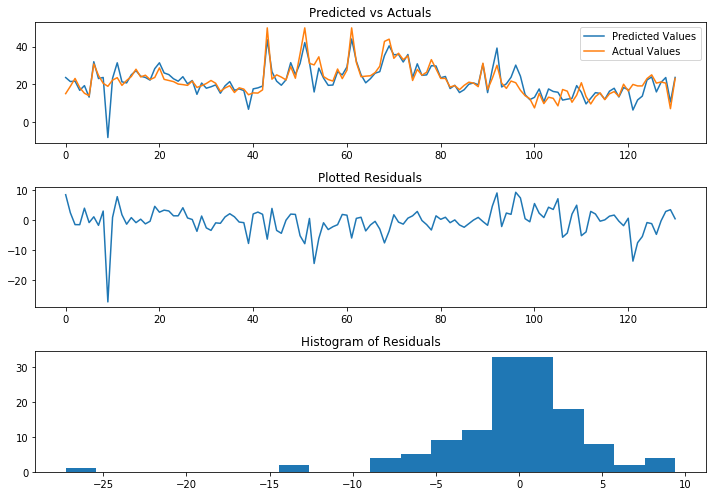

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn import impute, pipeline, decomposition

from sklearn.model_selection import cross_val_predict

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as CK


boston = datasets.load_boston()
X = boston.data
y = boston.target
train_set = np.random.choice([True, False], len(y), p=[.75, .25])
X_train, X_test = X[train_set], X[~train_set]
y_train, y_test = y[train_set], y[~train_set]

mixed_kernel = CK(1.0, (1e-4, 1e4)) * RBF(10, (1e-4, 1e4))
gpr = GaussianProcessRegressor(alpha=5, n_restarts_optimizer=20, kernel=mixed_kernel)
gpr.fit(X_train, y_train)

y_pred = gpr.predict(X_test)

plt.figure(figsize=(10, 7), tight_layout=True)

plt.subplot(3, 1, 1, title="Predicted vs Actuals")
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.plot(range(len(y_pred)), y_test, label='Actual Values')
plt.legend(loc='best')

plt.subplot(3, 1, 2, title="Plotted Residuals")
plt.plot(range(len(y_pred)), y_pred - y_test)

plt.subplot(3, 1, 3, title="Histogram of Residuals")
plt.hist(y_pred - y_test, bins=20)

plt.show()